In [1]:
import lhapdf
#import ROOT
import math
import pandas as pd
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
plt.rcParams['text.usetex'] = True
## Getting a PDF member object
p_cteq6 = lhapdf.mkPDF("cteq6l1", 0)
p_cteq18 = lhapdf.mkPDF("CT18qed",0)
JAM20 = lhapdf.mkPDF("JAM20-SIDIS_FF_pion_nlo", 0)
JAM20_PDF = lhapdf.mkPDF("JAM20-SIDIS_PDF_proton_nlo", 0)
#JAM21_PDF = lhapdf.mkPDF("JAM21PionPDFnlo", 0)

LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/cteq6l1/cteq6l1_0000.dat
cteq6l1 PDF set, member #0, version 4; LHAPDF ID = 10042
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/CT18qed/CT18qed_0000.dat
CT18qed PDF set, member #0, version 1
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/JAM20-SIDIS_FF_pion_nlo/JAM20-SIDIS_FF_pion_nlo_0000.dat
JAM20-SIDIS_FF_pion_nlo PDF set, member #0, version 2
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/JAM20-SIDIS_PDF_proton_nlo/JAM20-SIDIS_PDF_proton_nlo_0000.dat
JAM20-SIDIS_PDF_proton_nlo PDF set, member #0, version 2


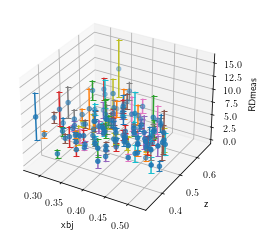

In [2]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
df = pd.read_csv("results/csv.csv")
xs = df[df['Q2']==4]['xbj_corr']
zs = df[df['Q2']==4]['z_corr']
RDs = df[df['Q2']==4]['y_RD']
RD_err = df[df['Q2']==4]['error_RD']
#ax.errorbar(xs,zs,RDs,RD_err,marker = "_")
for i in range(0,len(xs)):
    xbj_corr = xs[i]
    z_corr = zs[i]
    RD = RDs[i]
    RD_error = RD_err[i]
    ax.plot([xbj_corr,xbj_corr],[z_corr,z_corr],[RD+RD_error,RD-RD_error],marker="_")
ax.scatter(xs,zs,RDs)
ax.set_xlabel("xbj")
ax.set_ylabel("z")
ax.set_zlabel("RDmeas")
plt.show()
#plt.savefig("RD_xbj_z")

In [3]:
#df[df['Q2'] == 4.75].head()
df.describe()

,Q2,Q2_corr,Q2_corr_err,xbj,xbj_corr,xbj_corr_err,z,z_corr,z_corr_err,RunGroup,...,yield_neg_incnorad,yield_neg_incrad,yield_pos_incnorad,yield_pos_incrad,W2_corr,Wp2_corr,xprime_corr,zprime_corr,shms_p,shms_dp
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,...,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,373.000000,373.000000,387.000000,387.000000
mean,4.697674,4.374907,0.012825,0.448514,0.448760,0.000082,0.462726,0.463463,0.000075,305.478036,...,10.648208,9.479349,16.873481,15.267469,6.296240,3.637854,0.426610,0.443898,2.414620,2.610889
std,0.595216,0.708220,0.007137,0.074823,0.070167,0.000025,0.069774,0.066185,0.000031,142.060946,...,10.693538,9.660740,16.673942,15.310029,0.983591,0.685459,0.062460,0.064213,0.387254,9.770223
min,4.000000,3.072320,0.001459,0.275000,0.278487,0.000014,0.325000,0.333986,0.000003,90.000000,...,0.203569,0.181304,0.317505,0.286971,4.369330,2.842170,0.273047,0.320308,1.569590,-9.225080
25%,4.000000,3.846530,0.007259,0.375000,0.389602,0.000072,0.425000,0.423211,0.000050,180.000000,...,3.146945,2.698215,5.007215,4.341065,5.555060,3.068795,0.377052,0.405853,2.128520,-6.211820
50%,4.750000,4.424060,0.012191,0.425000,0.440770,0.000094,0.475000,0.471058,0.000089,290.000000,...,6.637630,5.900650,10.628600,9.706990,6.209230,3.472530,0.416600,0.450148,2.457350,-0.380967
75%,5.500000,4.886100,0.017653,0.525000,0.514415,0.000100,0.525000,0.518679,0.000100,440.000000,...,14.542900,12.845700,22.985300,20.880750,6.878250,4.042780,0.461149,0.496379,2.716350,10.869900
max,5.500000,6.060700,0.031787,0.625000,0.612865,0.000111,0.675000,0.659579,0.000108,550.000000,...,55.368600,52.285000,83.349500,81.021600,9.623580,6.521520,0.545935,0.640100,3.402800,23.379000


In [4]:
#CSVS_results = []
pdf_sets = []
i_FF = 2
FF_model = ["fDSSLO","fDSSNLO","JAM20","hknsff07_LO","hknsff07_NLO"]
i_PDF = 1
PDF_model = ["cteq6l1","JAM20","cteq18qed"]
i_assumption = '7ass_rho'

In [5]:
#here the third and fourth inits are switched
#inits=(0,0)
#three input
#inits = (1,-1,1)
#inits = (0.31621375387783907,0.9655536623222454,2.2,1.4)
#inits = (0.31621375387783907,0.9655536623222454,4,0.2)
inits = (0.31621375387783907,0.9655536623222454,1.8,-0.2,-1)
#inits = (0.31621375387783907,1.0602531294347466,0.60029420012617,0.5690151479308769)
#four input
#4
#inits=(0.5837438039662431,-1.1844700435399933,1.6742194710533476,0)
#4.75
#inits=(0.5487693365000776,-1.0881946339773718,1.594995464377801,0)
#5.5
#inits=(0.38322380904636766,-0.47844410509432217,1.115729075281362,0)
a_rho = -1.6
#rho_file = open("rho_sub_kai2.txt","a")
#rho_file.write("\n")
#rho_file.write(str(a_rho))
#rho_file.write(" ")

In [6]:
from iminuit import Minuit
import scipy.integrate as integrate
import scipy.special as sc
import sys
sys.path.insert(1,'DSS')
import fDSS_
sys.path.insert(1,'hkns07fflib-v1_2')
import hknsff07_
def Deltaz_param(z_had,alpha,beta):
    delta_z = z_had**alpha*(1-z_had)**beta
    return delta_z
def Dz_param(z_had,alpha,beta):
    delta_z = z_had**alpha*(1-z_had)**beta
    return (1-delta_z)/(1+delta_z)
    #return params[0]+params[1]*z_had+params[2]*z_had**2+params[3]*z_had**3
def CSVx_param(xbj,a,b):
    #a = -0.5 
    c = sc.beta(b+2,a+1)/sc.beta(b+1,a+1)
    CSVx = (1-xbj)**a*xbj**b*(xbj-c)
    #CSVx = params[3]*(1-xbj)**params[2]*xbj**(-0.5)*(xbj-c)
    #CSVx = (1-xbj)**4*xbj**params[3]*(xbj-params[2])
    #CSVx = (1-xbj)**params[2]*xbj**params[3]*(xbj-0.0909)
    #CSVx = (1-xbj)**params[2]*xbj**params[3]
    #CSVx = 2*params[len(params)-1]*(1-xbj)**4*xbj**-0.5*(xbj-0.0909)
    #CSVx = params[len(params)-1]
    return CSVx
    #return params[len(params)-1]
def Bxz_param(Q,z_had,xbj,i_pdf,i_ff):
    duplus = 0
    duminus = 0
    dsplus = 0
    dsminus = 0
    delta_z = 0
    if i_ff==0:
        duplus = fDSS_.fdss(1,1,0,z_hadron,Q*Q)[0]
        duminus = fDSS_.fdss(1,-1,0,z_hadron,Q*Q)[0]
        dsplus = fDSS_.fdss(1,1,0,z_hadron,Q*Q)[4]
        dsminus = fDSS_.fdss(1,-1,0,z_hadron,Q*Q)[4]
        delta_z = duminus/duplus 
    elif i_ff==1:
        duplus = fDSS_.fdss(1,1,1,z_hadron,Q*Q)[0]
        duminus = fDSS_.fdss(1,-1,1,z_hadron,Q*Q)[0]
        dsplus = fDSS_.fdss(1,1,1,z_hadron,Q*Q)[4]
        dsminus = fDSS_.fdss(1,-1,1,z_hadron,Q*Q)[4]
        delta_z = duminus/duplus
        #return (1-delta_z)/(1+delta_z)
    elif i_ff==2:
        duplus = JAM20.xfxQ(2,z_had,Q)
        duminus = JAM20.xfxQ(-2,z_had,Q)
        dsplus = JAM20.xfxQ(3,z_had,Q)
        dsminus = JAM20.xfxQ(-3,z_had,Q)
        delta_z = duminus/duplus
    elif i_ff==3:
        
        ff = np.zeros(11)
        grad = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,z_hadron,1,1,ff,grad)
        ff_minus = np.zeros(11)
        grad_minus = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,z_hadron,1,2,ff_minus,grad_minus)
        duplus = ff[6]
        dsplus = ff[8]
        duminus = ff_minus[6]
        dsminus = ff_minus[8]
        delta_z = duminus/duplus
    elif i_ff==4:
        
        ff = np.zeros(11)
        grad = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,z_hadron,2,1,ff,grad)
        ff_minus = np.zeros(11)
        grad_minus = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,z_hadron,2,2,ff_minus,grad_minus)
        duplus = ff[6]
        dsplus = ff[8]
        duminus = ff_minus[6]
        dsminus = ff_minus[8]
        delta_z = duminus/duplus
    ubar = 0
    dbar = 0
    uv = 0
    dv = 0
    strange = 0
    sbar = 0
    if i_pdf == 0:
        ubar = p_cteq6.xfxQ(-2,xbj,Q)
        dbar = p_cteq6.xfxQ(-1,xbj,Q)
        uv = p_cteq6.xfxQ(2,xbj,Q)-ubar
        dv = p_cteq6.xfxQ(1,xbj,Q)-dbar
        strange = p_cteq6.xfxQ(3,xbj,Q)
        sbar = p_cteq6.xfxQ(-3,xbj,Q)
    elif i_pdf == 1:
        ubar = JAM20_PDF.xfxQ(-2,xbj,Q)
        dbar = JAM20_PDF.xfxQ(-1,xbj,Q)
        uv = JAM20_PDF.xfxQ(2,xbj,Q)-ubar
        dv = JAM20_PDF.xfxQ(1,xbj,Q)-dbar
        strange = JAM20_PDF.xfxQ(3,xbj,Q)
        sbar = JAM20_PDF.xfxQ(-3,xbj,Q)
    elif i_pdf == 2:
        ubar = p_cteq18.xfxQ(-2,xbj,Q)
        dbar = p_cteq18.xfxQ(-1,xbj,Q)
        uv = p_cteq18.xfxQ(2,xbj,Q)-ubar
        dv = p_cteq18.xfxQ(1,xbj,Q)-dbar
        strange = p_cteq18.xfxQ(3,xbj,Q)
        sbar = p_cteq18.xfxQ(-3,xbj,Q)
    B_NS = 5*(ubar+dbar)/(uv+dv)
    B_sz = (dsplus+dsminus)/duplus/(1+delta_z) 
    B_S = B_sz*(strange+sbar)/(uv+dv)
    return 5/2+B_NS+B_S
def Ax_param(Q,xbj,i_pdf):
    uv = 0
    dv = 0
    if i_pdf == 0:
        uv = p_cteq6.xfxQ(2,xbj,Q)-p_cteq6.xfxQ(-2,xbj,Q)
        dv = p_cteq6.xfxQ(1,xbj,Q)-p_cteq6.xfxQ(-1,xbj,Q)
    elif i_pdf == 1:
        uv = JAM20_PDF.xfxQ(2,xbj,Q)-JAM20_PDF.xfxQ(-2,xbj,Q)
        dv = JAM20_PDF.xfxQ(1,xbj,Q)-JAM20_PDF.xfxQ(-1,xbj,Q)
    elif i_pdf ==2:
        uv = p_cteq18.xfxQ(2,xbj,Q)-p_cteq18.xfxQ(-2,xbj,Q)
        dv = p_cteq18.xfxQ(1,xbj,Q)-p_cteq18.xfxQ(-1,xbj,Q)
    return -4/(3*(uv+dv))
def dRDmeas_rho(neg_D2_yield,pos_D2_yield,neg_rho_yield,a):
    neg_yield = neg_D2_yield+a*neg_rho_yield
    pos_yield = pos_D2_yield+a*neg_rho_yield
    RY = neg_D2_yield/pos_D2_yield
    RY_rho = neg_yield/pos_yield
    RD = (4*RY-1)/(1-RY)
    RD_rho = (4*RY_rho-1)/(1-RY_rho)
    return RD-RD_rho
def RDmeas_CSV(Q,z_had,xbj,neg_D2_yield,pos_D2_yield,neg_rho_yield,alpha,beta,a,b,gamma,i_pdf,i_ff):
    
    Dz = Dz_param(z_had,alpha,beta)
    CSVx = CSVx_param(xbj,a,b)
    
    Bx = Bxz_param(Q,z_had,xbj,i_pdf,i_ff)
    Ax = Ax_param(Q,xbj,i_pdf)
    dRD_rho = dRDmeas_rho(neg_D2_yield,pos_D2_yield,neg_rho_yield,gamma)
    return (Bx-Ax*CSVx)/Dz-2.5+dRD_rho


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/3608236254.py:46: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  m_1stQ2.migrad()


0.40468719929174846 1.9177596413357045 1.576713329331225 -1.1281610581462453 -1.9466417091174337
206.05366319548955
0.40468719929174846


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/3608236254.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/3608236254.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/3608236254.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/3608236254.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.appe

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/3608236254.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/3608236254.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/3608236254.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/3608236254.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.appe

'\n#x = np.array(xs)\n#y = np.array(zs)\nfit_RDmeas=[]\nfor xbj in xbj_fit:\n    fit_RDmeas_zi = []\n    for zi in zhad_fit:\n        #fit_RDmeas_zi.append()\n        fit_RDmeas.append(RDmeas_CSV(Q,zi,xi,neg_D2_yield[i],pos_D2_yield[i],neg_D2_rho[i],alpha,beta,a,b,gamma,i_PDF,i_FF)))\n           \nX,Y = np.meshgrid(xbj_fit,zhad_fit)\nZ = np.reshape(fit_RDmeas,X.shape)\nax.plot_surface(X,Y,Z)\n#ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=plt.cm.jet,linewidth=0,antialiased=False)\n#plt.plot(zs,fit_RDmeas,label = "fit")\n#print(xs) \n#print(zs)\nfit_info = [\n    f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m_1stQ2.fval:.1f} / {len(zs) - m_1stQ2.nfit}",\n]\nprint(fit_info)\nfor p, v, e in zip(m_1stQ2.parameters, m_1stQ2.values, m_1stQ2.errors):\n    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")\nplt.legend(title="\n".join(fit_info))\n\n     \nplt.show()\n#print(str(m_1stQ2.fval))\n#rho_file.write(str(m_1stQ2.fval))\n#rho_file.write(" ")\n'

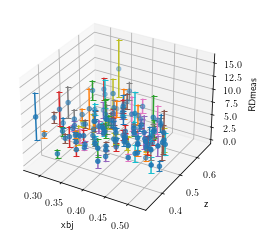

In [7]:

Q2 = 4
Q = math.sqrt(4)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
xs = []
zs = []
RDs = []
for i,row in df[df['Q2']==Q2].iterrows():
    xbj_corr = row['xbj_corr']
    xs.append(xbj_corr)
    #print(xbj_corr)
    z_corr = row['z_corr']
    zs.append(z_corr)
    RD = row['y_RD']
    RDs.append(RD)
    RD_error = row['error_RD']
    ax.plot([xbj_corr,xbj_corr],[z_corr,z_corr],[RD+RD_error,RD-RD_error],marker="_")
ax.scatter(xs,zs,RDs)
ax.set_xlabel("xbj")
ax.set_ylabel("z")
ax.set_zlabel("RDmeas")

def least_squares_1stQ2(alpha,beta,a,b,gamma):
    least_square = 0
    for i,row in df[df['Q2']==Q2].iterrows():
        Q2corr = row['Q2_corr']
        xbj = row['xbj_corr']
        zhad = row['z_corr']
        RD = row['y_RD']
        RD_err = row['error_RD']
        neg_D2_yield = row['yield_neg']
        pos_D2_yield = row['yield_pos']
        neg_D2_rho = row['yield_neg_rho']
        Qcorr = math.sqrt(Q2corr)
    
        least_square+=((RD-RDmeas_CSV(Qcorr,zhad,xbj,neg_D2_yield,pos_D2_yield,neg_D2_rho,alpha,beta,a,b,gamma,i_PDF,i_FF)))**2/(RD_err)**2
    return least_square
   
    
m_1stQ2 = Minuit(least_squares_1stQ2,alpha = inits[0],beta = inits[1],a = inits[2],b = inits[3],gamma = inits[4])
m_1stQ2.limits['gamma'] = (-2, -0.5)
m_1stQ2.limits['alpha'] = (0,1)
m_1stQ2.limits['beta'] = (0,2)
#m_1stQ2.limits['a'] = (-2,0)
#m_1stQ2.limits['b'] = (0,4)
m_1stQ2.migrad()
m_1stQ2.hesse()
print(*m_1stQ2.values)
print(m_1stQ2.fval)

alpha = m_1stQ2.values[0]
print(alpha)

dfArhoout = pd.DataFrame()
for i,row in df[df['Q2']==Q2].iterrows():
    Q2corr = row['Q2_corr']
    xbj = row['xbj_corr']
    zhad = row['z_corr']
    RD = row['y_RD']
    RD_err = row['error_RD']
    neg_D2_yield = row['yield_neg']
    pos_D2_yield = row['yield_pos']
    neg_D2_rho = row['yield_neg_rho']
    Qcorr = math.sqrt(Q2corr)
    #residual = RD/RD_err
    residual = (RD-RDmeas_CSV(Qcorr,zhad,xbj,neg_D2_yield,pos_D2_yield,neg_D2_rho,m_1stQ2.values[0],m_1stQ2.values[1],m_1stQ2.values[2],m_1stQ2.values[3],m_1stQ2.values[4],i_PDF,i_FF))/RD_err
    #(RD-RDmeas_CSV(Qcorr,zhad,xbj,neg_D2_yield,pos_D2_yield,neg_D2_rho,alpha,beta,a,b,gamma,i_PDF,i_FF))/RD_err
    #print(residual)
    row['Residual_Arho']=(residual)
    dfArhoout = dfArhoout.append(row)
    #print(row)
    #dfArhoout=pd.concat([dfArhoout,row],ignore_index = True,axis = 1)
    #df = pd.concat([df, df2], ignore_index = True, axis = 0)
dfArhoout.head()

xbj_fit = np.arange(0.25,0.7,0.01)
zhad_fit = np.arange(0.3,0.75,0.01)
'''
#x = np.array(xs)
#y = np.array(zs)
fit_RDmeas=[]
for xbj in xbj_fit:
    fit_RDmeas_zi = []
    for zi in zhad_fit:
        #fit_RDmeas_zi.append()
        fit_RDmeas.append(RDmeas_CSV(Q,zi,xi,neg_D2_yield[i],pos_D2_yield[i],neg_D2_rho[i],alpha,beta,a,b,gamma,i_PDF,i_FF)))
           
X,Y = np.meshgrid(xbj_fit,zhad_fit)
Z = np.reshape(fit_RDmeas,X.shape)
ax.plot_surface(X,Y,Z)
#ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=plt.cm.jet,linewidth=0,antialiased=False)
#plt.plot(zs,fit_RDmeas,label = "fit")
#print(xs) 
#print(zs)
fit_info = [
    f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m_1stQ2.fval:.1f} / {len(zs) - m_1stQ2.nfit}",
]
print(fit_info)
for p, v, e in zip(m_1stQ2.parameters, m_1stQ2.values, m_1stQ2.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
plt.legend(title="\n".join(fit_info))

     
plt.show()
#print(str(m_1stQ2.fval))
#rho_file.write(str(m_1stQ2.fval))
#rho_file.write(" ")
'''

In [8]:
print(dfArhoout.head())

    Q2  Q2_corr  Q2_corr_err    xbj  xbj_corr  xbj_corr_err      z    z_corr  \
0  4.0  3.37275     0.010472  0.275  0.278487      0.000075  0.325  0.344239   
1  4.0  3.37644     0.007994  0.275  0.282134      0.000071  0.375  0.373989   
2  4.0  3.78996     0.016357  0.325  0.324579      0.000101  0.375  0.376585   
3  4.0  4.20543     0.016580  0.375  0.371190      0.000095  0.375  0.380968   
4  4.0  4.59366     0.011313  0.425  0.418406      0.000089  0.375  0.386491   

   z_corr_err  RunGroup  ...  yield_neg_incrad  yield_pos_incnorad  \
0    0.000007     100.0  ...           5.37980              8.1510   
1    0.000102     100.0  ...          33.96720             52.2889   
2    0.000093     100.0  ...          51.16280             83.3495   
3    0.000080     100.0  ...          26.20740             44.6229   
4    0.000042     100.0  ...           6.63342             11.7916   

   yield_pos_incrad  W2_corr  Wp2_corr  xprime_corr  zprime_corr   shms_p  \
0            8.7125  

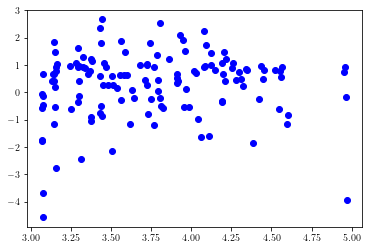

In [9]:
plt.plot(dfArhoout['Q2_corr'],dfArhoout['Residual_Arho'],'bo')

In [10]:
m_1stQ2.params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,alpha,0.40,0.11,,,0,1,
1,beta,1.9,1.6,,,0,2,
2,a,1.6,0.4,,,,,
3,b,-1.13,0.23,,,,,
4,gamma,-1.9,1.0,,,-2,-0.5,


In [11]:
for p in m_1stQ2.params:
    print(repr(p))

Param(number=0, name='alpha', value=0.40468719929174846, error=0.11308447549245726, merror=None, is_const=False, is_fixed=False, lower_limit=0.0, upper_limit=1.0)
Param(number=1, name='beta', value=1.9177596413357045, error=1.5928867221972016, merror=None, is_const=False, is_fixed=False, lower_limit=0.0, upper_limit=2.0)
Param(number=2, name='a', value=1.576713329331225, error=0.40523143864307415, merror=None, is_const=False, is_fixed=False, lower_limit=None, upper_limit=None)
Param(number=3, name='b', value=-1.1281610581462453, error=0.22918928739732103, merror=None, is_const=False, is_fixed=False, lower_limit=None, upper_limit=None)
Param(number=4, name='gamma', value=-1.9466417091174337, error=1.0014334685190809, merror=None, is_const=False, is_fixed=False, lower_limit=-2.0, upper_limit=-0.5)


0.39893054345118784 1.9999022015784695 1.7751079828890937 -1.2273641729912979 -1.9999999980248342
193.29354728241313
0.39893054345118784


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/2042229066.py:48: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  m_2ndQ2.migrad()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/2042229066.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/2042229066.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/2042229066.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/204

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/2042229066.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/2042229066.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/2042229066.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/2042229066.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.appe

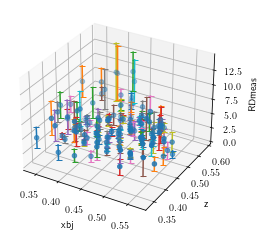

In [12]:
Q2 = 4.75

Q = math.sqrt(Q2)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
xs = []
zs = []
RDs = []

for i,row in df[df['Q2']==Q2].iterrows():
    xbj_corr = row['xbj_corr']
    xs.append(xbj_corr)
    #print(xbj_corr)
    z_corr = row['z_corr']
    zs.append(z_corr)
    RD = row['y_RD']
    RDs.append(RD)
    RD_error = row['error_RD']
    ax.plot([xbj_corr,xbj_corr],[z_corr,z_corr],[RD+RD_error,RD-RD_error],marker="_")
ax.scatter(xs,zs,RDs)
ax.set_xlabel("xbj")
ax.set_ylabel("z")
ax.set_zlabel("RDmeas")

def least_squares_2ndQ2(alpha,beta,a,b,gamma):
    least_square = 0
    for i,row in df[df['Q2']==Q2].iterrows():
        Q2corr = row['Q2_corr']
        xbj = row['xbj_corr']
        zhad = row['z_corr']
        RD = row['y_RD']
        RD_err = row['error_RD']
        neg_D2_yield = row['yield_neg']
        pos_D2_yield = row['yield_pos']
        neg_D2_rho = row['yield_neg_rho']
        Qcorr = math.sqrt(Q2corr)
    
        least_square+=((RD-RDmeas_CSV(Qcorr,zhad,xbj,neg_D2_yield,pos_D2_yield,neg_D2_rho,alpha,beta,a,b,gamma,i_PDF,i_FF)))**2/(RD_err)**2
    return least_square
   
    
m_2ndQ2 = Minuit(least_squares_2ndQ2,alpha = inits[0],beta = inits[1],a = inits[2],b = inits[3],gamma = inits[4])
m_2ndQ2.limits['gamma'] = (-2, -0.5)
m_2ndQ2.limits['alpha'] = (0,1)
m_2ndQ2.limits['beta'] = (0,2)
#m_2ndQ2.limits['a'] = (-2,0)
#m_2ndQ2.limits['b'] = (0,4)
m_2ndQ2.migrad()
m_2ndQ2.hesse()
print(*m_2ndQ2.values)
print(m_2ndQ2.fval)

alpha = m_2ndQ2.values[0]
print(alpha)

#dfArhoout = pd.DataFrame()
for i,row in df[df['Q2']==Q2].iterrows():
    Q2corr = row['Q2_corr']
    xbj = row['xbj_corr']
    zhad = row['z_corr']
    RD = row['y_RD']
    RD_err = row['error_RD']
    neg_D2_yield = row['yield_neg']
    pos_D2_yield = row['yield_pos']
    neg_D2_rho = row['yield_neg_rho']
    Qcorr = math.sqrt(Q2corr)
    #residual = RD/RD_err
    residual = (RD-RDmeas_CSV(Qcorr,zhad,xbj,neg_D2_yield,pos_D2_yield,neg_D2_rho,m_2ndQ2.values[0],m_2ndQ2.values[1],m_2ndQ2.values[2],m_2ndQ2.values[3],m_2ndQ2.values[4],i_PDF,i_FF))/RD_err
    #(RD-RDmeas_CSV(Qcorr,zhad,xbj,neg_D2_yield,pos_D2_yield,neg_D2_rho,alpha,beta,a,b,gamma,i_PDF,i_FF))/RD_err
    #print(residual)
    row['Residual_Arho']=(residual)
    dfArhoout = dfArhoout.append(row)
#print(dfArhoout)

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/4031906558.py:48: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  m_3rdQ2.migrad()


0.08523516719979618 1.63890569122827 2.1465866391831208 -0.18939370028209435 -1.9999999896648555
176.2720478676597
0.08523516719979618


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/4031906558.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/4031906558.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/4031906558.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/4031906558.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.appe

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/4031906558.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/4031906558.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/4031906558.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/4031906558.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArhoout = dfArhoout.appe

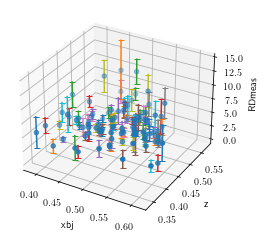

In [13]:
Q2 = 5.5

Q = math.sqrt(Q2)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
xs = []
zs = []
RDs = []

for i,row in df[df['Q2']==Q2].iterrows():
    xbj_corr = row['xbj_corr']
    xs.append(xbj_corr)
    #print(xbj_corr)
    z_corr = row['z_corr']
    zs.append(z_corr)
    RD = row['y_RD']
    RDs.append(RD)
    RD_error = row['error_RD']
    ax.plot([xbj_corr,xbj_corr],[z_corr,z_corr],[RD+RD_error,RD-RD_error],marker="_")
ax.scatter(xs,zs,RDs)
ax.set_xlabel("xbj")
ax.set_ylabel("z")
ax.set_zlabel("RDmeas")

def least_squares_3rdQ2(alpha,beta,a,b,gamma):
    least_square = 0
    for i,row in df[df['Q2']==Q2].iterrows():
        Q2corr = row['Q2_corr']
        xbj = row['xbj_corr']
        zhad = row['z_corr']
        RD = row['y_RD']
        RD_err = row['error_RD']
        neg_D2_yield = row['yield_neg']
        pos_D2_yield = row['yield_pos']
        neg_D2_rho = row['yield_neg_rho']
        Qcorr = math.sqrt(Q2corr)
    
        least_square+=((RD-RDmeas_CSV(Qcorr,zhad,xbj,neg_D2_yield,pos_D2_yield,neg_D2_rho,alpha,beta,a,b,gamma,i_PDF,i_FF)))**2/(RD_err)**2
    return least_square
   
    
m_3rdQ2 = Minuit(least_squares_3rdQ2,alpha = inits[0],beta = inits[1],a = inits[2],b = inits[3],gamma = inits[4])
m_3rdQ2.limits['gamma'] = (-2, -0.5)
m_3rdQ2.limits['alpha'] = (0,1)
m_3rdQ2.limits['beta'] = (0,2)
#m_3rdQ2.limits['a'] = (-2,0)
#m_3rdQ2.limits['b'] = (0,4)
m_3rdQ2.migrad()
m_3rdQ2.hesse()
print(*m_3rdQ2.values)
print(m_3rdQ2.fval)

alpha = m_3rdQ2.values[0]
print(alpha)

#dfArhoout = pd.DataFrame()
for i,row in df[df['Q2']==Q2].iterrows():
    Q2corr = row['Q2_corr']
    xbj = row['xbj_corr']
    zhad = row['z_corr']
    RD = row['y_RD']
    RD_err = row['error_RD']
    neg_D2_yield = row['yield_neg']
    pos_D2_yield = row['yield_pos']
    neg_D2_rho = row['yield_neg_rho']
    Qcorr = math.sqrt(Q2corr)
    #residual = RD/RD_err
    residual = (RD-RDmeas_CSV(Qcorr,zhad,xbj,neg_D2_yield,pos_D2_yield,neg_D2_rho,m_3rdQ2.values[0],m_3rdQ2.values[1],m_3rdQ2.values[2],m_3rdQ2.values[3],m_3rdQ2.values[4],i_PDF,i_FF))/RD_err
    #(RD-RDmeas_CSV(Qcorr,zhad,xbj,neg_D2_yield,pos_D2_yield,neg_D2_rho,alpha,beta,a,b,gamma,i_PDF,i_FF))/RD_err
    #print(residual)
    row['Residual_Arho']=(residual)
    dfArhoout = dfArhoout.append(row)



In [14]:
#dfArhoout[dfArhoout['Q2'] == 5.5].head()
dfArhoout.head()

,Q2,Q2_corr,Q2_corr_err,xbj,xbj_corr,xbj_corr_err,z,z_corr,z_corr_err,RunGroup,...,yield_neg_incrad,yield_pos_incnorad,yield_pos_incrad,W2_corr,Wp2_corr,xprime_corr,zprime_corr,shms_p,shms_dp,Residual_Arho
0,4.0,3.37275,0.010472,0.275,0.278487,0.000075,0.325,0.344239,0.000007,100.0,...,5.37980,8.1510,8.7125,9.62358,6.52152,0.273047,0.337436,2.22258,-8.46546,0.782369
1,4.0,3.37644,0.007994,0.275,0.282134,0.000071,0.375,0.373989,0.000102,100.0,...,33.96720,52.2889,50.8403,9.47924,6.17179,0.276137,0.365692,2.38734,-1.68022,-0.891768
2,4.0,3.78996,0.016357,0.325,0.324579,0.000101,0.375,0.376585,0.000093,100.0,...,51.16280,83.3495,81.0216,8.77394,5.71100,0.316565,0.366879,2.34447,-3.44549,1.369359
3,4.0,4.20543,0.016580,0.375,0.371190,0.000095,0.375,0.380968,0.000080,100.0,...,26.20740,44.6229,40.6557,8.01172,5.19479,0.360333,0.369801,2.30069,-5.24857,1.476652
4,4.0,4.59366,0.011313,0.425,0.418406,0.000089,0.375,0.386491,0.000042,100.0,...,6.63342,11.7916,10.0885,7.27139,4.67926,0.404611,0.374031,2.26197,-6.84323,-1.146132


In [15]:
df = df[df['shms_dp']>-9.5]
df = df[df['shms_dp']<24.5]
df = df[df['error_RD']<3]
df.describe()

,Q2,Q2_corr,Q2_corr_err,xbj,xbj_corr,xbj_corr_err,z,z_corr,z_corr_err,RunGroup,...,yield_neg_incnorad,yield_neg_incrad,yield_pos_incnorad,yield_pos_incrad,W2_corr,Wp2_corr,xprime_corr,zprime_corr,shms_p,shms_dp
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,...,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,348.000000,348.000000,358.000000,358.000000
mean,4.708101,4.379002,0.013122,0.449022,0.449229,0.000083,0.462151,0.462843,0.000076,305.586592,...,11.227394,9.994654,17.789104,16.089571,6.287973,3.637788,0.427874,0.443155,2.410607,2.568321
std,0.595258,0.698945,0.007126,0.072826,0.068543,0.000024,0.067900,0.064547,0.000030,141.550308,...,10.900359,9.852933,16.987639,15.609921,0.961813,0.670224,0.061350,0.062160,0.379402,9.610302
min,4.000000,3.072320,0.001459,0.275000,0.282134,0.000014,0.325000,0.333986,0.000003,90.000000,...,0.203569,0.181304,0.317505,0.286971,4.369330,2.842170,0.276137,0.320470,1.577690,-9.225080
25%,4.000000,3.851752,0.007665,0.375000,0.389410,0.000073,0.425000,0.423318,0.000054,180.000000,...,3.465158,2.883357,5.496975,4.826900,5.585340,3.075773,0.377052,0.406012,2.131820,-6.178805
50%,4.750000,4.428355,0.012421,0.450000,0.450967,0.000095,0.475000,0.471355,0.000091,290.000000,...,7.231875,6.337805,11.736750,10.308850,6.147900,3.481460,0.418640,0.450082,2.462640,-0.364213
75%,5.500000,4.875170,0.018465,0.525000,0.514429,0.000101,0.525000,0.518204,0.000100,440.000000,...,15.368225,13.294525,24.723250,22.294425,6.815262,4.045000,0.461406,0.494385,2.708385,10.840150
max,5.500000,6.060700,0.031787,0.625000,0.612865,0.000111,0.625000,0.620279,0.000107,550.000000,...,55.368600,52.285000,83.349500,81.021600,9.479240,6.171790,0.545935,0.600677,3.401780,23.379000


In [16]:
Qs = []
parameters = []
param_errs = []
kaisquare = []

def least_squares_Q2(alpha,beta,a,b,gamma):
    least_square = 0
    for i,row in df.iterrows():
        Q2corr = row['Q2_corr']
        xbj = row['xbj_corr']
        zhad = row['z_corr']
        RD = row['y_RD']
        RD_err = row['error_RD']
        neg_D2_yield = row['yield_neg']
        pos_D2_yield = row['yield_pos']
        neg_D2_rho = row['yield_neg_rho']
        Qcorr = math.sqrt(Q2corr)
        least_square+=((RD-RDmeas_CSV(Qcorr,zhad,xbj,neg_D2_yield,pos_D2_yield,neg_D2_rho,alpha,beta,a,b,gamma,i_PDF,i_FF)))**2/(RD_err)**2
    return least_square
m_Q2 = Minuit(least_squares_Q2,alpha = inits[0],beta = inits[1],a = inits[2],b = inits[3],gamma = inits[4])
#m_Q2.limits['gamma'] = (-1.2, -0.8)
m_Q2.fixed['gamma'] = True
#m_Q2.limits['a'] = (0,3)
#m_Q2.limits['b'] = (-0.5,0.5)
m_Q2.errordef = Minuit.LEAST_SQUARES
m_Q2.migrad()
m_Q2.hesse()
print(*m_Q2.values)
#print(m_Q2.values["a"])
parameters.append(m_Q2.values)
param_errs.append(m_Q2.errors)
#print(m_Q2.values["a"])
print(len(df)) 
#print(m_Q2.values)
#print(m_Q2.errors)
print(m_Q2.fval)
fit_info = [
    f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m_Q2.fval:.1f} / {len(df) - m_Q2.nfit}",
]
for p, v, e in zip(m_Q2.parameters, m_Q2.values, m_Q2.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
print(fit_info)
'''

'''
dfrhoallout = pd.DataFrame()
for i,row in df.iterrows():
    Q2corr = row['Q2_corr']
    xbj = row['xbj_corr']
    zhad = row['z_corr']
    RD = row['y_RD']
    RD_err = row['error_RD']
    neg_D2_yield = row['yield_neg']
    pos_D2_yield = row['yield_pos']
    neg_D2_rho = row['yield_neg_rho']
    Qcorr = math.sqrt(Q2corr)
    residual = (RD-RDmeas_CSV(Qcorr,zhad,xbj,neg_D2_yield,pos_D2_yield,neg_D2_rho,m_Q2.values[0],m_Q2.values[1],m_Q2.values[2],m_Q2.values[3],m_Q2.values[4],i_PDF,i_FF))/RD_err
    #(RD-RDmeas_CSV(Qcorr,zhad,xbj,neg_D2_yield,pos_D2_yield,neg_D2_rho,alpha,beta,a,b,gamma,i_PDF,i_FF))/RD_err
    #print(residual)
    row['Residual_Arho']=(residual)
    dfrhoallout = dfrhoallout.append(row)


dfrhoallout.to_csv('results/csv_rho_all_out.csv',index = False)



0.3021569215296435 1.1233491141594663 3.1079430104585866 -0.09614375272633907 -1.0
358
612.8131272587027
['$\\chi^2$ / $n_\\mathrm{dof}$ = 612.8 / 354', 'alpha = $0.302 \\pm 0.037$', 'beta = $1.123 \\pm 0.142$', 'a = $3.108 \\pm 0.647$', 'b = $-0.096 \\pm 1.501$', 'gamma = $-1.000 \\pm -0.010$']


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/2578067064.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/2578067064.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/2578067064.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/2578067064.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = 

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/2578067064.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/2578067064.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/2578067064.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/2578067064.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = 

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/2578067064.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/2578067064.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/2578067064.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/2578067064.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = 

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/2578067064.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/2578067064.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/2578067064.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/2578067064.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = 

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/2578067064.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/2578067064.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/2578067064.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69092/2578067064.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = 

In [17]:
import json
with open('results/CSVs_2dfit.json') as CSV2d_infile:
    j_CSV2d_out=json.load(CSV2d_infile)
name = i_assumption+'all_param'
param_len = len(parameters[0])
print(param_len)
parametersall = []
for i in range(param_len):
    
    parametersall.append(parameters[0][i])
print(parametersall)

j_CSV2d_out[name] = {'Dzparam':parametersall}
with open('results/CSVs_2dfit.json','w') as CSV2d_outfile:
    json.dump(j_CSV2d_out,CSV2d_outfile,indent = 4)

5
[0.3021569215296435, 1.1233491141594663, 3.1079430104585866, -0.09614375272633907, -1.0]


In [18]:
print(m_Q2.covariance)

┌───────┬──────────────────────────────────────────────┐
│       │    alpha     beta        a        b    gamma │
├───────┼──────────────────────────────────────────────┤
│ alpha │  0.00135  0.00226 -0.00344  -0.0362        0 │
│  beta │  0.00226   0.0201    -0.03   -0.202        0 │
│     a │ -0.00344    -0.03    0.419    0.179        0 │
│     b │  -0.0362   -0.202    0.179     2.25        0 │
│ gamma │        0        0        0        0        0 │
└───────┴──────────────────────────────────────────────┘


LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/JAM20-SIDIS_FF_pion_nlo/JAM20-SIDIS_FF_pion_nlo_0000.dat
JAM20-SIDIS_FF_pion_nlo PDF set, member #0, version 2


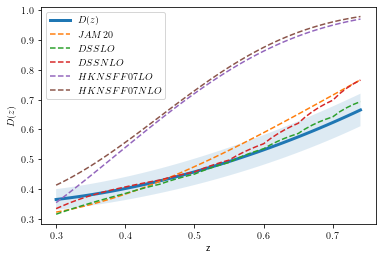

In [19]:
#dont

from iminuit.util import propagate
def Deltaz_param(z_had,params):
    delta_z = z_had**params[0]*(1-z_had)**params[1]
    return delta_z
def D_z_from_deltaz(deltaz,deltaz_err):
    D_z = (1-deltaz)/(1+deltaz)
    D_zerr = (2*deltaz_err)/(1+deltaz)**2
    return D_z,D_zerr
Deltaz_all, Deltacov_all = propagate(lambda p: Deltaz_param(zhad_fit, p), m_Q2.values, m_Q2.covariance)
Deltaz_err_prop_all = np.diag(Deltacov_all)**0.5
D_z_all = D_z_from_deltaz(Deltaz_all,Deltaz_err_prop_all)
plt.plot(zhad_fit,D_z_all[0],lw = 3,label = r"$D(z)$")
plt.fill_between(zhad_fit,D_z_all[0]-D_z_all[1],D_z_all[0]+D_z_all[1],alpha = 0.15)

Q = 2
JAM20 = lhapdf.mkPDF("JAM20-SIDIS_FF_pion_nlo", 0)
JAM20_Deltaz = []
DSS_LO = []
DSS_NLO = []
HKNSFF07_LO = []
HKNSFF07_NLO = []
z_axis = np.arange(0.3,0.75,0.01)
for zi in z_axis:
    dup = JAM20.xfxQ(2,zi,Q)
    dum = JAM20.xfxQ(-2,zi,Q)
    #print(dup,' ',dum)
    JAM20_Deltaz.append(dum/dup)
    DSS_LO.append(fDSS_.fdss(1,-1,0,zi,Q*Q)[0]/fDSS_.fdss(1,1,0,zi,4.75)[0])
    DSS_NLO.append(fDSS_.fdss(1,-1,1,zi,Q*Q)[0]/fDSS_.fdss(1,1,1,zi,4.75)[0])
    ff = np.zeros(11)
    grad = np.zeros((11,17))
    hknsff07_.hknsff(Q*Q,zi,1,1,ff,grad)
    ff_minus = np.zeros(11)
    grad_minus = np.zeros((11,17))
    hknsff07_.hknsff(Q*Q,zi,1,2,ff_minus,grad_minus)
    duplus = zi*ff[6]
    duminus = zi*ff_minus[6]
    HKNSFF07_LO.append(duminus/duplus)
    ff_NLO = np.zeros(11)
    grad_NLO = np.zeros((11,17))
    hknsff07_.hknsff(Q*Q,zi,2,1,ff_NLO,grad_NLO)
    ff_NLO_minus = np.zeros(11)
    grad_NLO_minus = np.zeros((11,17))
    hknsff07_.hknsff(Q*Q,zi,2,2,ff_NLO_minus,grad_NLO_minus)
    duplus_NLO = zi*ff_NLO[6]
    duminus_NLO = zi*ff_NLO_minus[6]
    HKNSFF07_NLO.append(duminus_NLO/duplus_NLO)

plt.plot(z_axis,(1-np.asarray(JAM20_Deltaz))/(1+np.asarray(JAM20_Deltaz)),linestyle='dashed',label = r'$JAM20$')
plt.ylabel(r'$D(z)$')
plt.xlabel('z')
plt.plot(z_axis,(1-np.asarray(DSS_LO))/(1+np.asarray(DSS_LO)),linestyle='dashed',label = r'$DSS LO$')
plt.plot(z_axis,(1-np.asarray(DSS_NLO))/(1+np.asarray(DSS_NLO)),linestyle='dashed',label = r'$DSS NLO$')
plt.plot(z_axis,(1-np.asarray(HKNSFF07_LO))/(1+np.asarray(HKNSFF07_LO)),linestyle='dashed',label = r'$HKNSFF07 LO$')
plt.plot(z_axis,(1-np.asarray(HKNSFF07_NLO))/(1+np.asarray(HKNSFF07_NLO)),linestyle='dashed',label = r'$HKNSFF07 NLO$')





plt.legend()
plt.savefig("results/Dz_err_7rhoall.pdf")

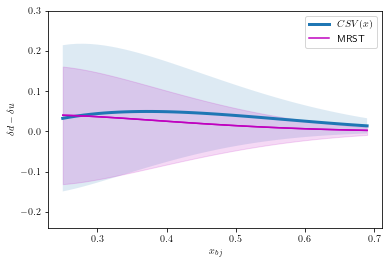

In [20]:
#def CSVx_param(xbj,a,b):
#    #a = -0.5 
#    c = sc.beta(b+2,a+1)/sc.beta(b+1,a+1)
#    CSVx = (1-xbj)**a*xbj**b*(xbj-c)
def CSVx_param(xbj,params):
    a = params[3]
    #a = -0.5
    b = params[2]
    c = sc.beta(a+2,b+1)/sc.beta(a+1,b+1)
    CSVx = (1-xbj)**params[2]*xbj**params[3]*(xbj-c)
    #CSVx = params[3]*(1-xbj)**params[2]*xbj**(-0.5)*(xbj-c)
    #CSVx = (1-xbj)**4*xbj**params[3]*(xbj-params[2])
    #CSVx = (1-xbj)**params[2]*xbj**params[3]*(xbj-0.0909)
    #CSVx = (1-xbj)**params[2]*xbj**params[3]
    #CSVx = 2*params[len(params)-1]*(1-xbj)**4*xbj**-0.5*(xbj-0.0909)
    #CSVx = params[len(params)-1]
    return CSVx
CSVx_all, CSVcov_all = propagate(lambda p: CSVx_param(xbj_fit, p), m_Q2.values, m_Q2.covariance)
plt.plot(xbj_fit,CSVx_all,lw = 3,label = r"$CSV(x)$")
CSVx_err_prop_all = np.diag(CSVcov_all)**0.5
plt.fill_between(xbj_fit,CSVx_all-CSVx_err_prop_all,CSVx_all+CSVx_err_prop_all,alpha = 0.15)


i_assumption_all = "7ass_rhoall_"
with open('results/CSVs_2dfit.json') as CSV2d_infile:
    j_CSV2d_out=json.load(CSV2d_infile)

xbj_ones_plot = j_CSV2d_out[i_assumption_all]["xbj_ones"]
CSV_ones_plot = j_CSV2d_out[i_assumption_all]["CSVs_ones"]
CSV_ones_err_plot = j_CSV2d_out[i_assumption_all]["CSVs_ones_errs"]
xbj_twos_plot = j_CSV2d_out[i_assumption_all]["xbj_twos"]
CSV_twos_plot = j_CSV2d_out[i_assumption_all]["CSVs_twos"]
CSV_twos_err_plot = j_CSV2d_out[i_assumption_all]["CSVs_twos_errs"]
xbj_threes_plot = j_CSV2d_out[i_assumption_all]["xbj_threes"]
CSV_threes_plot = j_CSV2d_out[i_assumption_all]["CSVs_threes"]
CSV_threes_err_plot = j_CSV2d_out[i_assumption_all]["CSVs_threes_errs"]

for i in range(len(CSV_ones_plot)):
    plt.plot([xbj_ones_plot[i],xbj_ones_plot[i]],[CSV_ones_plot[i]-CSV_ones_err_plot[i],CSV_ones_plot[i]+CSV_ones_err_plot[i]],marker = "_",color = "k")
plt.plot(xbj_ones_plot,CSV_ones_plot,"ko",label = r"$<Q^2> = 4\ GeV^2$")
for i in range(len(CSV_twos_plot)):
    plt.plot([xbj_twos_plot[i],xbj_twos_plot[i]],[CSV_twos_plot[i]-CSV_twos_err_plot[i],CSV_twos_plot[i]+CSV_twos_err_plot[i]],marker = "_",color = "g")
plt.plot(xbj_twos_plot,CSV_twos_plot,"go",label = r"$<Q^2> = 4.75\ GeV^2$")
for i in range(len(CSV_threes_plot)):
    plt.plot([xbj_threes_plot[i],xbj_threes_plot[i]],[CSV_threes_plot[i]-CSV_threes_err_plot[i],CSV_threes_plot[i]+CSV_threes_err_plot[i]],marker = "_",color = "b")
plt.plot(xbj_threes_plot,CSV_threes_plot,"bo",label = r"$<Q^2> = 5.5\ GeV^2$")




def delta_udv(parameter):
    x = np.arange(0.25,0.7,0.01)
    return parameter*(1-x)**4*x**-0.5*(x-0.0909)

x_axis = np.arange(0.25,0.7,0.01)
y_delta_uv = delta_udv(-0.2)
y_delta_dv = delta_udv(0.2)
plt.plot(x_axis,y_delta_dv-y_delta_uv,color = 'm',label = 'MRST')
y_delta_uv_up = delta_udv(0.8)
y_delta_uv_low = delta_udv(-0.8)
y_delta_dv_up = delta_udv(-0.65)
y_delta_dv_low = delta_udv(0.65)
#plt.plot(x_axis,y_delta_dv-y_delta_uv,label = 'xCSV')
#plt.plot(x_axis,y_delta_uv_up-y_delta_uv_low,'-.')
#plt.plot(x_axis,y_delta_dv_up-y_delta_dv_low,'--')
plt.fill_between(x_axis,y_delta_uv_up-y_delta_uv_low,y_delta_dv_up-y_delta_dv_low,color = 'm',alpha = 0.15)
plt.legend()
plt.plot(x_axis,y_delta_dv-y_delta_uv,color = 'm',label = 'MRST')

#plt.xlim(0.25,0.7)
plt.ylim(-0.24,0.3)
plt.xlabel(r"$x_{bj}$")
plt.ylabel(r"$\delta d - \delta u$")

plt.savefig("results/CSV_err_7rhoall.pdf")

In [21]:
'''
xbj_all = xbj_fit = np.arange(0,1,0.01)
def CSVx_param(xbj,params):
    a = params[3]
    #a = -0.5
    b = params[2]
    c = sc.beta(a+2,b+1)/sc.beta(a+1,b+1)
    CSVx = (1-xbj)**params[2]*xbj**params[3]*(xbj-c)
    #CSVx = params[3]*(1-xbj)**params[2]*xbj**(-0.5)*(xbj-c)
    #CSVx = (1-xbj)**4*xbj**params[3]*(xbj-params[2])
    #CSVx = (1-xbj)**params[2]*xbj**params[3]*(xbj-0.0909)
    #CSVx = (1-xbj)**params[2]*xbj**params[3]
    #CSVx = 2*params[len(params)-1]*(1-xbj)**4*xbj**-0.5*(xbj-0.0909)
    #CSVx = params[len(params)-1]
    return CSVx
CSVx_all, CSVcov_all = propagate(lambda p: CSVx_param(xbj_all, p), m_Q2.values, m_Q2.covariance)
plt.plot(xbj_fit,CSVx_all,lw = 3,label = r"$CSV(x)$")
CSVx_err_prop_all = np.diag(CSVcov_all)**0.5
plt.fill_between(xbj_all,CSVx_all-CSVx_err_prop_all,CSVx_all+CSVx_err_prop_all,alpha = 0.15)

#plt.xlim(0.25,0.75)
'''

'\nxbj_all = xbj_fit = np.arange(0,1,0.01)\ndef CSVx_param(xbj,params):\n    a = params[3]\n    #a = -0.5\n    b = params[2]\n    c = sc.beta(a+2,b+1)/sc.beta(a+1,b+1)\n    CSVx = (1-xbj)**params[2]*xbj**params[3]*(xbj-c)\n    #CSVx = params[3]*(1-xbj)**params[2]*xbj**(-0.5)*(xbj-c)\n    #CSVx = (1-xbj)**4*xbj**params[3]*(xbj-params[2])\n    #CSVx = (1-xbj)**params[2]*xbj**params[3]*(xbj-0.0909)\n    #CSVx = (1-xbj)**params[2]*xbj**params[3]\n    #CSVx = 2*params[len(params)-1]*(1-xbj)**4*xbj**-0.5*(xbj-0.0909)\n    #CSVx = params[len(params)-1]\n    return CSVx\nCSVx_all, CSVcov_all = propagate(lambda p: CSVx_param(xbj_all, p), m_Q2.values, m_Q2.covariance)\nplt.plot(xbj_fit,CSVx_all,lw = 3,label = r"$CSV(x)$")\nCSVx_err_prop_all = np.diag(CSVcov_all)**0.5\nplt.fill_between(xbj_all,CSVx_all-CSVx_err_prop_all,CSVx_all+CSVx_err_prop_all,alpha = 0.15)\n\n#plt.xlim(0.25,0.75)\n'

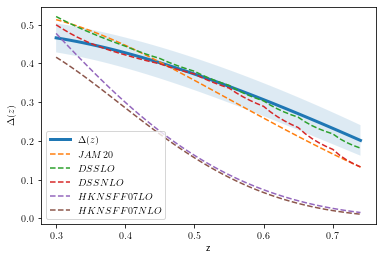

In [22]:
Deltaz_all, Deltacov_all = propagate(lambda p: Deltaz_param(zhad_fit, p), m_Q2.values, m_Q2.covariance)
plt.plot(zhad_fit,Deltaz_all,lw = 3,label = r"$\Delta(z)$")
Deltaz_err_prop_all = np.diag(Deltacov_all)**0.5
plt.fill_between(zhad_fit,Deltaz_all-Deltaz_err_prop_all,Deltaz_all+Deltaz_err_prop_all,alpha = 0.15)

plt.plot(z_axis,np.asarray(JAM20_Deltaz),linestyle='dashed',label = r'$JAM20$')
plt.ylabel(r'$\Delta(z)$')
plt.xlabel('z')
plt.plot(z_axis,np.asarray(DSS_LO),linestyle='dashed',label = r'$DSS LO$')
plt.plot(z_axis,np.asarray(DSS_NLO),linestyle='dashed',label = r'$DSS NLO$')
plt.plot(z_axis,np.asarray(HKNSFF07_LO),linestyle='dashed',label = r'$HKNSFF07 LO$')
plt.plot(z_axis,np.asarray(HKNSFF07_NLO),linestyle='dashed',label = r'$HKNSFF07 NLO$')
plt.legend()
plt.savefig("results/Deltaz_err_7rhoall.pdf")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 0, 'error bars for good Residual Arho')

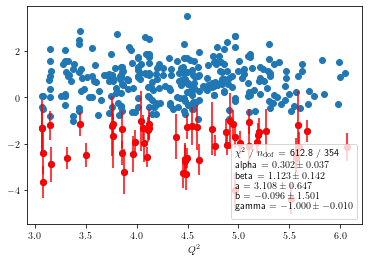

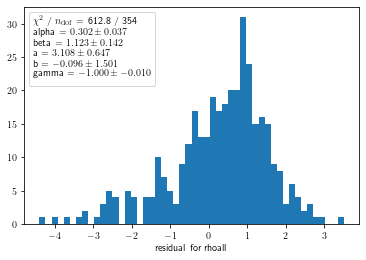

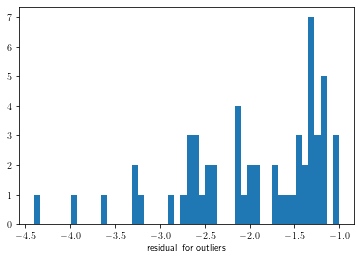

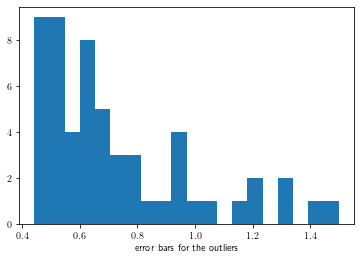

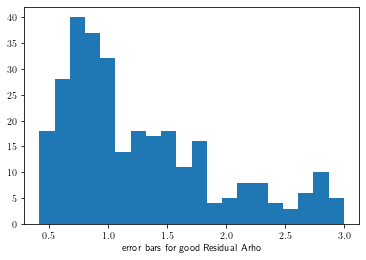

In [23]:
#plt.plot(dfrhorhoallout['Q2_corr'],dfrhorhoallout['Residual_Arho'],'bo')
#plt.hist(dfrhorhoallout['Residual_Arho'],50)
plt.scatter(dfrhoallout['Q2_corr'],dfrhoallout['Residual_Arho'])
#plt.errorbar(dfrhoallout['Q2_corr'],dfrhoallout['Residual_Arho'],dfrhoallout['error_RD'],fmt = 'o')
plt.errorbar(dfrhoallout[dfrhoallout['Residual_Arho']<-1]['Q2_corr'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['Residual_Arho'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['error_RD'],fmt = 'o',color = 'r')
plt.xlabel(r'$Q^2$')
plt.legend(title="\n".join(fit_info))
plt.savefig("results/Residual_7assumption_rhoall_Q2.pdf")
#print(len(dfrhoallout['Residual_Arho']))
fig,ax = plt.subplots() 
plt.hist(dfrhoallout['Residual_Arho'],50)
plt.xlabel('residual for rhoall')
plt.legend(title="\n".join(fit_info))
plt.savefig("results/Residual_7assumption_rhoall.pdf")
fig,ax = plt.subplots() 
plt.hist(dfrhoallout[dfrhoallout['Residual_Arho']<-1]['Residual_Arho'],50)
plt.xlabel('residual for outliers')
fig,ax = plt.subplots() 
plt.hist(dfrhoallout[dfrhoallout['Residual_Arho']<-1]['error_RD'],20)
plt.xlabel('error bars for the outliers')
fig,ax = plt.subplots() 
plt.hist(dfrhoallout[dfrhoallout['Residual_Arho']>-1]['error_RD'],20)
plt.xlabel('error bars for good Residual Arho')

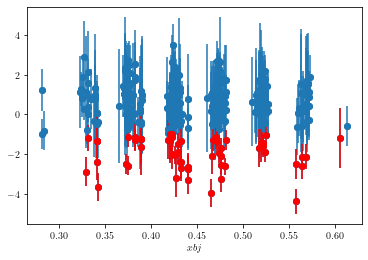

In [24]:
plt.scatter(dfrhoallout['xbj_corr'],dfrhoallout['Residual_Arho'])
plt.errorbar(dfrhoallout['xbj_corr'],dfrhoallout['Residual_Arho'],dfrhoallout['error_RD'],fmt = 'o')
plt.errorbar(dfrhoallout[dfrhoallout['Residual_Arho']<-1]['xbj_corr'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['Residual_Arho'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['error_RD'],fmt = 'o',color = 'r')
plt.xlabel(r'$xbj$')
plt.savefig("results/Residual_7assumption_rhoall_xbj.pdf")

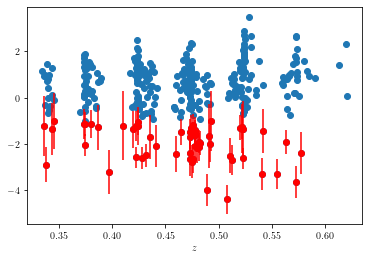

In [25]:
plt.scatter(dfrhoallout['z_corr'],dfrhoallout['Residual_Arho'])
#plt.errorbar(dfrhoallout['z_corr'],dfrhoallout['Residual_Arho'],dfrhoallout['error_RD'],fmt = 'o')
plt.errorbar(dfrhoallout[dfrhoallout['Residual_Arho']<-1]['z_corr'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['Residual_Arho'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['error_RD'],fmt = 'o',color = 'r')
plt.xlabel(r'$z$')
plt.savefig("results/Residual_7assumption_rhoall_z.pdf")

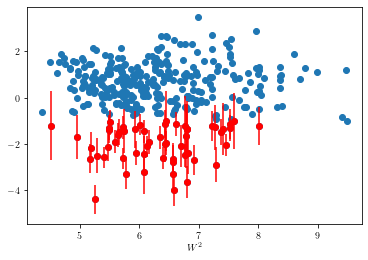

In [26]:
plt.scatter(dfrhoallout['W2_corr'],dfrhoallout['Residual_Arho'])
#plt.errorbar(dfrhoallout['W2_corr'],dfrhoallout['Residual_Arho'],dfrhoallout['error_RD'],fmt = 'o')
plt.errorbar(dfrhoallout[dfrhoallout['Residual_Arho']<-1]['W2_corr'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['Residual_Arho'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['error_RD'],fmt = 'o',color = 'r')
plt.xlabel(r'$W^2$')
plt.savefig("results/Residual_7assumption_rhoall_W2.pdf")

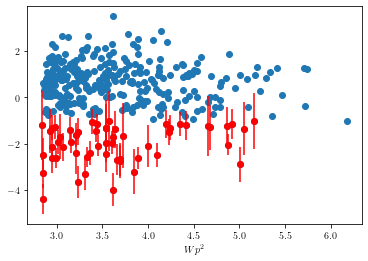

In [27]:
plt.scatter(dfrhoallout['Wp2_corr'],dfrhoallout['Residual_Arho'])
#plt.errorbar(dfrhoallout['Wp2_corr'],dfrhoallout['Residual_Arho'],dfrhoallout['error_RD'],fmt = 'o')
plt.errorbar(dfrhoallout[dfrhoallout['Residual_Arho']<-1]['Wp2_corr'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['Residual_Arho'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['error_RD'],fmt = 'o',color = 'r')
plt.xlabel(r'$Wp^2$')
plt.savefig("results/Residual_7assumption_rhoall_Wp2.pdf")

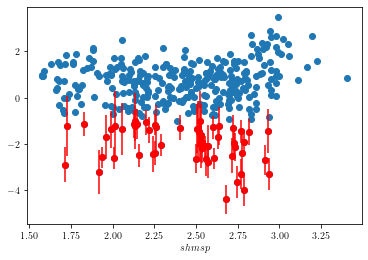

In [28]:
plt.scatter(dfrhoallout['shms_p'],dfrhoallout['Residual_Arho'])
#plt.errorbar(dfrhoallout['shms_p'],dfrhoallout['Residual_Arho'],dfrhoallout['error_RD'],fmt = 'o')
plt.errorbar(dfrhoallout[dfrhoallout['Residual_Arho']<-1]['shms_p'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['Residual_Arho'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['error_RD'],fmt = 'o',color = 'r')
plt.xlabel(r'$shmsp$')
plt.savefig("results/Residual_7assumption_rhoall_shms_p.pdf")

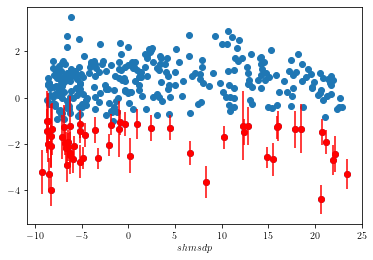

In [29]:
plt.scatter(dfrhoallout['shms_dp'],dfrhoallout['Residual_Arho'])
#plt.errorbar(dfrhoallout['shms_dp'],dfrhoallout['Residual_Arho'],dfrhoallout['error_RD'],fmt = 'o')
plt.errorbar(dfrhoallout[dfrhoallout['Residual_Arho']<-1]['shms_dp'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['Residual_Arho'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['error_RD'],fmt = 'o',color = 'r')
plt.xlabel(r'$shmsdp$')
plt.savefig("results/Residual_7assumption_rhoall_shms_dp.pdf")

In [30]:
import scipy.integrate as integrate
print(integrate.quad(CSVx_param,0,1,parameters[0]))



(2.1198275249061022e-14, 9.51064217829452e-09)


In [31]:
a = parameters[0][3]
b = parameters[0][2]
c = sc.beta(a+2,b+1)/sc.beta(a+1,b+1)
print(c)

0.180345660468979
